# Building `L-Layers NN Model` from Scratch (OOP)
## by Youssef Hussein

### Contact with me:
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/linkedin.svg" />][linkedin]
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/upwork.svg" />][upwork]
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/github.svg" />][github]
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/facebook.svg" />][facebook]

[linkedin]: https://www.linkedin.com/in/just-youssef
[upwork]: https://www.upwork.com/freelancers/~01bf41aeaec6f293c5
[github]: https://github.com/just-youssef
[facebook]: https://www.facebook.com/just.johnny99

## Step1: import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(5)

## Step 2: Helper Functions

In [2]:
# Helper functions: sigmoid

def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cached_Z -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cached_Z = Z
    
    return A, cached_Z

In [3]:
# Helper functions: relu

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cached_Z -- returns Z as well, useful during backpropagation
    """
    
    A = np.maximum(0,Z)
    cached_Z = Z
    
    assert(A.shape == Z.shape)

    return A, cached_Z

In [4]:
# Helper functions: sigmoid_backward

def sigmoid_backward(dA, cached_Z):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cached_Z -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cached_Z
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [5]:
# Helper functions: relu_backward

def relu_backward(dA, cached_Z):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cached_Z -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cached_Z
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [6]:
# Helper functions: linear_forward

def linear_forward(A_prev, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    linear_cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """

    Z = np.dot(W, A_prev) + b

    assert(Z.shape == (W.shape[0], A_prev.shape[1]))
    linear_cache = (A_prev, W, b)

    return Z, linear_cache

In [7]:
# Helper functions: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    linear_activation_cache -- a python tuple containing "linear_cache" and "activation_cache";
                                stored for computing the backward pass efficiently
    """
    Z, linear_cache = linear_forward(A_prev, W, b)

    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        A, activation_cache = relu(Z)

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    linear_activation_cache = (linear_cache, activation_cache)

    return A, linear_activation_cache

In [8]:
# Helper functions: linear_backward_l2_reg

def linear_backward_l2_reg(dZ, linear_cache, lambd):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    linear_cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]

    dW = 1/m * np.dot(dZ, A_prev.T) + (lambd/m)*W
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [9]:
# Helper functions: linear_activation_backward_l2_reg

def linear_activation_backward_l2_reg(dA, linear_activation_cache, activation, lambd):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    linear_activation_cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = linear_activation_cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        
    dA_prev, dW, db = linear_backward_l2_reg(dZ, linear_cache, lambd)
    
    return dA_prev, dW, db

**Notes**:
1. `NN_model` computes the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{1}$$

2. The standard way to avoid overfitting is called **L2 regularization**. It consists of appropriately modifying your cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

3. Recall the general update rule for `adam` is, for $l = 1, ..., L$: 
$$\begin{cases}
v_{W^{[l]}} = \beta_1 v_{W^{[l]}} + (1 - \beta_1) \frac{\partial J }{ \partial W^{[l]} } \\
v^{corrected}_{W^{[l]}} = \frac{v_{W^{[l]}}}{1 - (\beta_1)^t} \\
s_{W^{[l]}} = \beta_2 s_{W^{[l]}} + (1 - \beta_2) (\frac{\partial J }{\partial W^{[l]} })^2 \\
s^{corrected}_{W^{[l]}} = \frac{s_{W^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{W^{[l]}}}{\sqrt{s^{corrected}_{W^{[l]}}}+\varepsilon}
\end{cases}$$

## Step 3: `NN_model`

In [10]:
class NN_model:
    
    def __init__(model, layers_dims, learning_rate = 0.0007, mini_batch_size = 64,
                 beta1 = 0.9,beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, lambd = 0):
        """
        Initializes all attributes (parameters/hyperparameters) of the model.
        """
        model.layers_dims = layers_dims
        model.learning_rate = learning_rate
        model.mini_batch_size = mini_batch_size
        model.beta1 = beta1
        model.beta2 = beta2
        model.epsilon = epsilon
        model.num_epochs = num_epochs
        model.lambd = lambd
        
        # Parameters initialization
        model.parameters = model.initialize_parameters_he()
        model.v, model.s = model.initialize_adam()
    
    
    
    def initialize_parameters_he(model):
        """
        Initializes parameters of the model as a python dictionary.
        
        Returns:
        parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                        Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                        bl -- bias vector of shape (layer_dims[l], 1)
        """

        parameters = {}
        L = len(model.layers_dims)-1 # integer representing the number of layers

        for l in range(1, L+1):
            he_term =  np.sqrt(2/model.layers_dims[l-1]) #He initialization
            parameters[f'W{l}'] = np.random.randn(model.layers_dims[l], model.layers_dims[l-1]) * he_term
            parameters[f'b{l}'] = np.zeros((model.layers_dims[l], 1))

            assert(parameters[f'W{l}'].shape == (model.layers_dims[l], model.layers_dims[l-1]))
            assert(parameters[f'b{l}'].shape == (model.layers_dims[l], 1))

        return parameters
    
    
    
    def initialize_adam(model):
        """
        Initializes v and s as two python dictionaries with:
                    - keys: "dW1", "db1", ..., "dWL", "dbL" 
                    - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.

        Returns: 
        v -- python dictionary that will contain the exponentially weighted average of the gradient.
                        v[f'dW{l}'] = ...
                        v[f'db{l}'] = ...
        s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                        s[f'dW{l}'] = ...
                        s[f'db{l}'] = ...
        """

        L = len(model.parameters) // 2 # number of layers in the neural networks
        v = {}
        s = {}

        # Initialize v, s
        for l in range(1, L+1):
            v[f'dW{l}'] = np.zeros([model.parameters[f'W{l}'].shape[0], model.parameters[f'W{l}'].shape[1]])
            v[f'db{l}'] = np.zeros([model.parameters[f'b{l}'].shape[0], model.parameters[f'b{l}'].shape[1]])
            s[f'dW{l}'] = np.zeros([model.parameters[f'W{l}'].shape[0], model.parameters[f'W{l}'].shape[1]])
            s[f'db{l}'] = np.zeros([model.parameters[f'b{l}'].shape[0], model.parameters[f'b{l}'].shape[1]])

        return v, s

    
    
    def random_mini_batches(model, X, Y):
        """
        Creates a list of random minibatches from (X, Y)

        Arguments:
        X -- input data, of shape (input size, number of examples)
        Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)

        Returns:
        mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
        """

        m = X.shape[1]                  # number of training examples
        mini_batches = []

        # Step 1: Shuffle (X, Y)
        permutation = list(np.random.permutation(m))
        shuffled_X = X[:, permutation]
        shuffled_Y = Y[:, permutation].reshape((1,m))

        # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
        num_complete_minibatches = int(m/model.mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
        for k in range(0, num_complete_minibatches):
            mini_batch_X = shuffled_X[:, k*model.mini_batch_size: (k+1)*model.mini_batch_size]
            mini_batch_Y = shuffled_Y[:, k*model.mini_batch_size: (k+1)*model.mini_batch_size].reshape((1,model.mini_batch_size))
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)

        # Handling the end case (last mini-batch < mini_batch_size)
        if m % model.mini_batch_size != 0:
            mini_batch_X = shuffled_X[:, num_complete_minibatches*model.mini_batch_size:]
            mini_batch_Y = shuffled_Y[:, num_complete_minibatches*model.mini_batch_size:]
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)

        return mini_batches
    
    
    
    def L_model_forward(model, X):
        """
        Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

        Arguments:
        X -- data, numpy array of shape (input size, number of examples)

        Returns:
        AL -- last post-activation value
        L_model_caches -- list of caches containing:
                            every linear_activation_cache (there are L of them, indexed from 0 to L-1)
        """

        L_model_caches = []
        A = X
        L = len(model.parameters) // 2                  # number of layers in the neural network

        # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
        for l in range(1, L):
            A_prev = A 
            A, linear_activation_cache = linear_activation_forward(A_prev, model.parameters[f'W{l}'], 
                                                                   model.parameters[f'b{l}'], 'relu')
            L_model_caches.append(linear_activation_cache)

        # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
        AL, linear_activation_cache = linear_activation_forward(A, model.parameters[f'W{L}'], 
                                                                model.parameters[f'b{L}'], 'sigmoid')
        L_model_caches.append(linear_activation_cache)

        assert(AL.shape == (model.parameters[f'W{L}'].shape[0], X.shape[1]))

        return AL, L_model_caches
    
    
    
    def compute_cost_l2_reg(model, AL, Y):
        """
        Implement the cost function defined by equation (1).

        Arguments:
        AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
        Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

        Returns:
        cost -- cross-entropy cost + L2_regularization_cost
        """
        m = Y.shape[1]
        L = len(model.parameters) // 2 # number of layers in the neural network
        Wl_sum_squares = 0

        cross_entropy_cost = -1/m * np.sum(np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))

        for l in range(1, L+1):
            Wl_sum_squares += np.sum(np.square(model.parameters[f'W{l}']))

        L2_regularization_cost = model.lambd/(2*m) * Wl_sum_squares

        cost = cross_entropy_cost + L2_regularization_cost

        cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
        assert(cost.shape == ())

        return cost

    
    
    def L_model_backward_l2_reg(model, AL, Y, L_model_caches):
        """
        Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group

        Arguments:
        AL -- probability vector, output of the forward propagation (L_model_forward())
        Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
        L_model_caches -- list of caches containing:
                    every linear_activation_cache with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                    the linear_activation_cache with "sigmoid" (it's caches[L-1])

        Returns:
        grads -- A dictionary with the gradients
                 grads[f'dA{l}'] = ... 
                 grads[f'dW{l}'] = ...
                 grads[f'db{l}'] = ... 
        """
        grads = {}
        L_model_caches = dict(enumerate(L_model_caches, 1))
        L = len(L_model_caches) # the number of layers
        m = AL.shape[1]
        Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

        # Initializing the backpropagation
        dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL

        # Lth layer (SIGMOID -> LINEAR) gradients.
        dA_prev, dW, db = linear_activation_backward_l2_reg(dAL, L_model_caches[L], "sigmoid", model.lambd)
        grads[f'dA{L-1}'], grads[f'dW{L}'], grads[f'db{L}'] = dA_prev, dW, db

        # Loop from l=L-1 to l=1
        for l in range(L-1, 0, -1):
            # lth layer: (RELU -> LINEAR) gradients.
            dA_prev, dW, db = linear_activation_backward_l2_reg(dA_prev, L_model_caches[l],"relu", model.lambd)
            grads[f'dA{l-1}'], grads[f'dW{l}'], grads[f'db{l}'] = dA_prev, dW, db

        return grads
    
    
    
    def update_parameters_with_adam(model, grads, t):
        """
        Update parameters using Adam

        Arguments:
        grads -- python dictionary containing your gradients for each parameters
        t -- adam counter
        """

        L = len(model.parameters) // 2                 # number of layers in the neural networks
        v_corrected = {}                         # Initializing first moment estimate, python dictionary
        s_corrected = {}                         # Initializing second moment estimate, python dictionary

        # Perform Adam update on all parameters
        for l in range(1, L+1):
            # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
            model.v[f"dW{l}"] = model.beta1*model.v[f"dW{l}"] + (1-model.beta1)*grads[f"dW{l}"]
            model.v[f"db{l}"] = model.beta1*model.v[f"db{l}"] + (1-model.beta1)*grads[f"db{l}"]

            # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
            v_corrected[f"dW{l}"] = model.v[f"dW{l}"] / (1-model.beta1**t)
            v_corrected[f"db{l}"] = model.v[f"db{l}"] / (1-model.beta1**t)

            # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
            model.s[f"dW{l}"] = model.beta2*model.s[f"dW{l}"] + (1-model.beta2)*np.square(grads[f"dW{l}"])
            model.s[f"db{l}"] = model.beta2*model.s[f"db{l}"] + (1-model.beta2)*np.square(grads[f"db{l}"])

            # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
            s_corrected[f"dW{l}"] = model.s[f"dW{l}"] / (1-model.beta2**t)
            s_corrected[f"db{l}"] = model.s[f"db{l}"] / (1-model.beta2**t)

            # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
            model.parameters[f"W{l}"] -= model.learning_rate * v_corrected[f"dW{l}"] / (np.sqrt(s_corrected[f"dW{l}"]) + model.epsilon)
            model.parameters[f"b{l}"] -= model.learning_rate * v_corrected[f"db{l}"] / (np.sqrt(s_corrected[f"db{l}"]) + model.epsilon)
    
    
    
    def fit_with_adam(model, X, Y, print_cost = True):
        """
        Fits a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

        Arguments:
        X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
        Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
        print_cost -- if True, it prints the cost every 100 steps

        Returns:
        parameters -- parameters learnt by the model. They can then be used to predict.
        """

        L = len(model.layers_dims)       # number of layers in the neural networks
        costs = []                       # to keep track of the cost
        t = 0                            # initializing the counter required for Adam update
        seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
        m = X.shape[1]                   # number of training examples

        # Optimization loop
        for i in range(model.num_epochs):

            # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
            seed = seed + 1
            minibatches = model.random_mini_batches(X, Y)
            cost_total = 0

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch

                # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
                AL, L_model_caches = model.L_model_forward(minibatch_X)

                # Compute cost.
                cost_total += model.compute_cost_l2_reg(AL, minibatch_Y)

                # Backward propagation.
                grads = model.L_model_backward_l2_reg(AL, minibatch_Y, L_model_caches)

                # Update parameters with adam
                t += 1 # Adam counter
                parameters = model.update_parameters_with_adam(grads, t)
                
            cost_avg = cost_total / m

            # Print the cost every 1000 epoch
            if print_cost and i % 100 == 0:
                print ("Cost after epoch %i: %f" %(i, cost_avg))
                costs.append(cost_avg)

        # plot the cost
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('epochs (per 100)')
        plt.title(f"Learning rate = {model.learning_rate}")
        plt.show()

        return parameters
    
    
    
    def predict(model, X, Y=None, acc=False):
        """
        This function is used to predict the results of a  L-layer neural network.

        Arguments:
        X, Y -- data set of examples you would like to label
        parameters -- parameters of the trained model

        Returns:
        Yhat -- predictions for the given dataset X
        """

        # Forward propagation
        probs, L_model_caches = model.L_model_forward(X)

        # convert probs to 0/1 predictions (Yhat)
        Yhat = np.array(probs > 0.5).reshape(probs.shape)
        
        if (Y != None).all() and acc:
            assert(Yhat.shape == Y.shape)
            
            accuracy = np.mean(Yhat == Y)
            print(f"Accuracy: {accuracy}")
            
            return Yhat, accuracy
        
        return Yhat

## Step 4: `load_dataset`

In [11]:
# Step 4.1: implement load_dataset

import sklearn.datasets

def load_dataset():
    train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2)
    test_X, test_Y = sklearn.datasets.make_moons(n_samples=100, noise=.2)
    
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    
    # Visualize the data
    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y

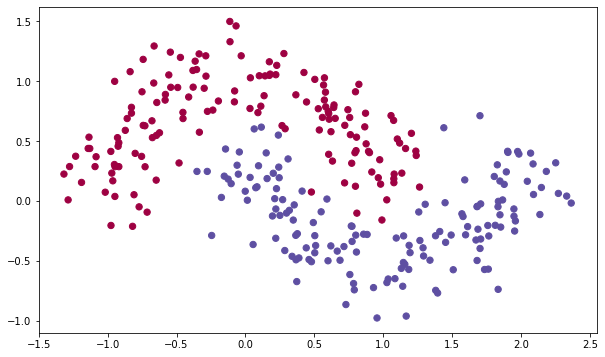

In [12]:
# Step 4.2: call load_dataset

train_X, train_Y, test_X, test_Y = load_dataset()

## Step 5: `NN_model` TEST1

Cost after epoch 0: 0.011183
Cost after epoch 100: 0.001519
Cost after epoch 200: 0.001206
Cost after epoch 300: 0.001242
Cost after epoch 400: 0.001046
Cost after epoch 500: 0.001036
Cost after epoch 600: 0.001014
Cost after epoch 700: 0.001071
Cost after epoch 800: 0.001056
Cost after epoch 900: 0.001014


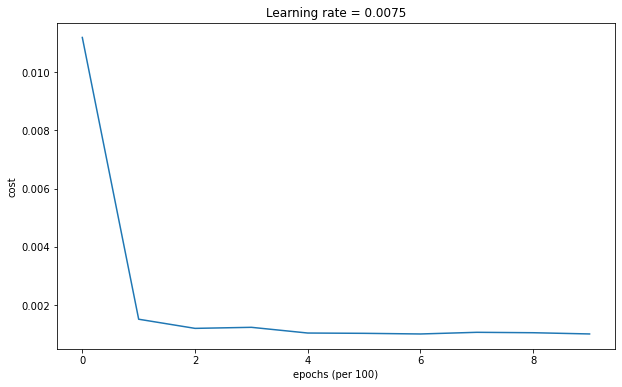

In [13]:
# CONSTANTS of a 4-layer model
n_x = train_X.shape[0]
n_h1 = 15
n_h2 = 7
n_h3 = 3
n_o = test_Y.shape[0]

layers_dims = [n_x, n_h1, n_h2, n_h3, n_o]

test_model = NN_model(layers_dims, learning_rate = 0.0075, mini_batch_size = 64, num_epochs = 1000, lambd = 0.1)
test_model.fit_with_adam(train_X, train_Y)

In [14]:
# Training Accuracy
pred_train, train_accuracy = test_model.predict(train_X, train_Y, acc=True)

Accuracy: 0.9933333333333333


In [15]:
# Test Accuracy
pred_test, test_accuracy = test_model.predict(test_X, test_Y, acc=True)

Accuracy: 0.98


## Step 6: `load_2D_dataset`

In [16]:
# Step 6.1: implement load_2D_dataset

import scipy.io

def load_2D_dataset():
    data = scipy.io.loadmat('datasets/data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T

    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y

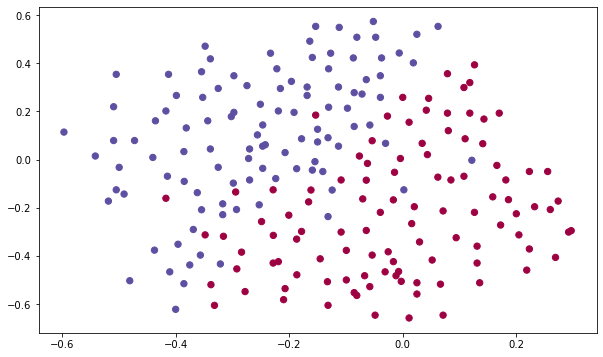

In [17]:
# Step 6.2: call load_2D_dataset

train_X, train_Y, test_X, test_Y = load_2D_dataset()

## Step 7: `NN_model` TEST2

Cost after epoch 0: 0.014257
Cost after epoch 100: 0.004758
Cost after epoch 200: 0.004839
Cost after epoch 300: 0.005051
Cost after epoch 400: 0.004832
Cost after epoch 500: 0.004950
Cost after epoch 600: 0.004460
Cost after epoch 700: 0.004746
Cost after epoch 800: 0.004335
Cost after epoch 900: 0.004213


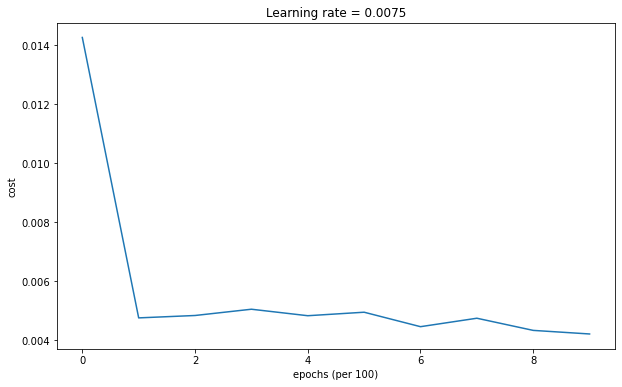

In [18]:
# CONSTANTS of a 4-layer model
n_x = train_X.shape[0]
n_h1 = 15
n_h2 = 7
n_h3 = 3
n_o = test_Y.shape[0]

layers_dims = [n_x, n_h1, n_h2, n_h3, n_o]

test_model = NN_model(layers_dims, learning_rate = 0.0075, mini_batch_size = 64, num_epochs = 1000, lambd = 0.1)
test_model.fit_with_adam(train_X, train_Y)

In [19]:
# Training Accuracy
pred_train, train_accuracy = test_model.predict(train_X, train_Y, acc=True)

Accuracy: 0.943127962085308


In [20]:
# Test Accuracy
pred_test, test_accuracy = test_model.predict(test_X, test_Y, acc=True)

Accuracy: 0.935
